In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_json('OUTPUT_CLEANED_telco_customer_churn.json')

In [4]:
data.head(3)

,Count,Country,State,City,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,...,CLTV,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male
0,1,United States,California,Los Angeles,90003,33.964131,-118.272783,0,0,0,...,3239,Competitor made better offer,0,0,0,0,0,0,1,1
1,1,United States,California,Los Angeles,90005,34.059281,-118.307420,0,0,1,...,2701,Moved,1,0,0,0,0,1,0,0
2,1,United States,California,Los Angeles,90006,34.048013,-118.293953,0,0,1,...,5372,Moved,1,0,0,0,0,1,0,0


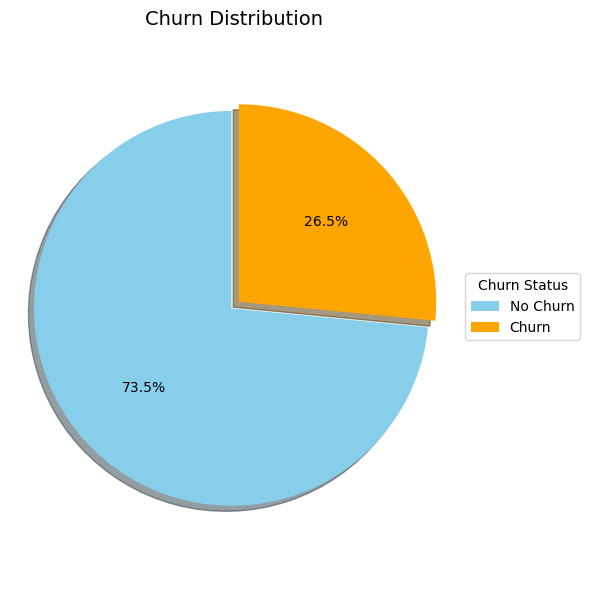

In [11]:
# Churn Distribution
# data['Churn Value'].value_counts(normalize=True).plot(kind='bar')

# Churn counts and labels
churn_counts = data['Churn Value'].value_counts()
labels = ['No Churn', 'Churn']
colors = ['skyblue', 'orange']

# Create pie chart
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    churn_counts,
    labels=None,  # Hide default labels
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0),
    shadow=True
)

# Add legend outside the pie
plt.legend(patches, labels, title='Churn Status', loc='center left', bbox_to_anchor=(1, 0.5))

# Title and layout
plt.title('Churn Distribution', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


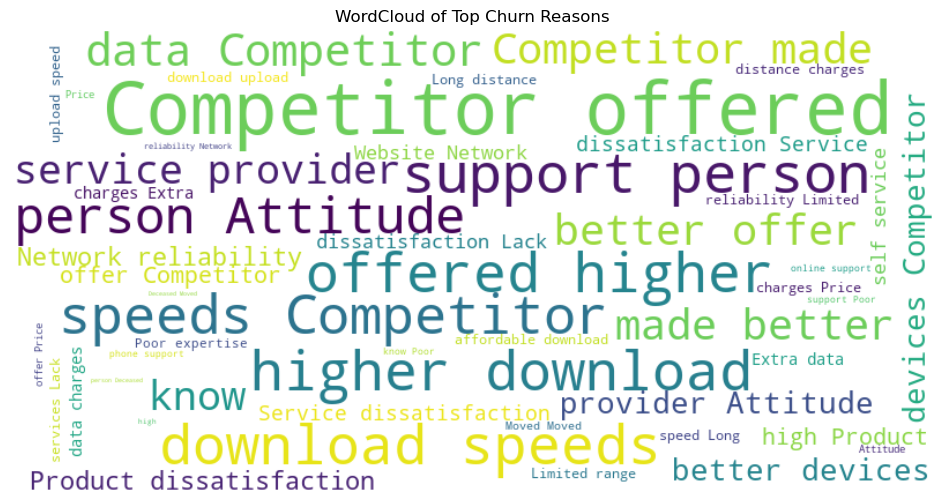

In [13]:
# 7. Top Churn Reasons

churn_reasons = data[data['Churn Value'] == 1]['Churn Reason'].dropna()
text = ' '.join(churn_reasons)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Top Churn Reasons')
plt.show()



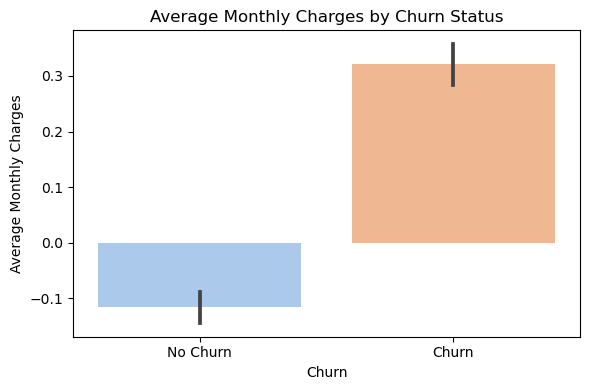

In [23]:
# Monthly Charges vs Churn

plt.figure(figsize=(6, 4))
sns.barplot(x='Churn Value', y='Monthly Charges', data=data, estimator=np.mean, palette='pastel')
plt.title('Average Monthly Charges by Churn Status')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')
plt.tight_layout()
plt.show()

